<a href="https://colab.research.google.com/github/flaaa31/ML/blob/main/progetto_ML_modelli_e_algoritmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificazione di frutti esotici

TropicTaste Inc., leader nella distribuzione di frutti esotici, intende migliorare l'efficienza e l'accuratezza nel processo di classificazione dei frutti. L'obiettivo è sviluppare un modello di machine learning in grado di predire il tipo di frutto basandosi su caratteristiche numeriche.

L'attuale processo di classificazione dei frutti esotici è manuale e soggetto a errori, risultando inefficiente e dispendioso in termini di risorse. La necessità di un sistema automatizzato e preciso è cruciale per ottimizzare le operazioni aziendali e mantenere alti standard qualitativi.

Implementando un modello di classificazione automatizzato, TropicTaste Inc. potrà:

- Migliorare l'Efficienza Operativa: Automatizzare la classificazione ridurrà il tempo e le risorse necessarie, aumentando la produttività.
- Ridurre gli Errori Umani: Un modello di machine learning minimizzerà gli errori di classificazione, garantendo una maggiore precisione.
- Ottimizzare l'Inventario: Una classificazione accurata permetterà una migliore gestione dell'inventario, assicurando condizioni ottimali di conservazione per ogni tipo di frutto.
- Aumentare la Soddisfazione del Cliente: Una corretta identificazione e classificazione dei frutti contribuirà a mantenere elevati standard di qualità, migliorando la soddisfazione dei clienti.
**Dettagli del Progetto:**

1. Dataset: Utilizzo di un dataset contenente varie caratteristiche numeriche di diversi frutti esotici.
2. Algoritmo: Implementazione dell'algoritmo K-Nearest Neighbors (KNN) per la classificazione.
3. Output: Il modello deve predire correttamente il tipo di frutto basandosi sui dati forniti.
**Requisiti del Progetto:**

1. Preparazione del Dataset:
  - Caricamento e preprocessamento dei dati sui frutti esotici.
  - Gestione di eventuali valori mancanti, normalizzazione e scalatura dei dati.
2. Implementazione del Modello KNN:
  - Sviluppo e addestramento del modello KNN.
  - Ottimizzazione dei parametri per migliorare l'accuratezza predittiva.
3. Valutazione delle Performance:
  - Utilizzo di tecniche di validazione incrociata per valutare la capacità di generalizzazione del modello.
  - Calcolo delle metriche di performance, come l'accuratezza e l'errore di classificazione.
4. Visualizzazione dei Risultati:
  - Creazione di grafici per visualizzare e confrontare le performance del modello.
  - Analisi e interpretazione dei risultati per identificare eventuali aree di miglioramento.

# Variabili del Dataset
Il dataset è scaricabile da qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv

Contiene le seguenti variabili:

1. Frutto: Il tipo di frutto. Questa è la variabile di destinazione (target) che vogliamo prevedere.
2. Peso (g): Il peso del frutto in grammi. Variabile continua.
3. Diametro medio (mm): Il diametro medio del frutto in millimetri. Variabile continua.
4. Lunghezza media (mm): La lunghezza media del frutto in millimetri. Variabile continua.
5. Durezza buccia (1-10): La durezza della buccia del frutto su una scala da 1 a 10. Variabile continua.
6. Dolcezza (1-10): La dolcezza del frutto su una scala da 1 a 10. Variabile continua.
7. Acidità (1-10): L'acidità del frutto su una scala da 1 a 10. Variabile continua.  

Ricorda di eseguire una corretta analisi esplorativa del dataset prima di procedere con il modello. Ricordati anche di applicare il corretto preprocessing ai dati e di misurare le performance del modello secondo le metriche che ritieni più utili.

Accompagna ogni passo dell’analisi con grafici appropriati e commenta adeguatamente ogni passaggio, estraendo degli insight utili all’analisi e alla comprensione dell’informazione trasmessa dal dato.



In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score

sns.set_theme()

In [ ]:
# Dataset download
!wget -O fruits.csv https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv

--2025-01-22 13:35:05--  https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 3.5.225.115, 3.5.224.103
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|3.5.225.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16433 (16K) [text/csv]
Saving to: ‘fruits.csv’

fruits.csv          100%[===================>]  16.05K  --.-KB/s    in 0.001s  

2025-01-22 13:35:06 (23.4 MB/s) - ‘fruits.csv’ saved [16433/16433]



In [ ]:
# Transforming data into pandas dataframe
df = pd.read_csv("fruits.csv")

# EDA

In [ ]:
# First lines of dataframe
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [ ]:
# Dimensions (rows and columns)
df.shape

(500, 6)

In [ ]:
# Column names and types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB
None


In [ ]:
# Descriptive statistics of true numerical features
print(df.describe())

         Peso (g)  Diametro medio (mm)  Lunghezza media (mm)  \
count  500.000000           500.000000            500.000000   
mean    47.313440            86.573100              5.298620   
std     26.768797            64.293403              2.641993   
min      8.570000             7.530000              1.150000   
25%     24.797500            50.510000              2.672500   
50%     42.380000            70.450000              5.670000   
75%     68.080000            88.852500              7.455000   
max    111.210000           299.890000             11.140000   

       Durezza buccia (1-10)  Dolcezza (1-10)  
count             500.000000       500.000000  
mean                7.437640         3.593220  
std                 1.812548         1.264899  
min                 3.070000         1.250000  
25%                 6.152500         2.570000  
50%                 7.340000         3.535000  
75%                 8.615000         4.465000  
max                13.720000         6.

In [ ]:
#Categorical features distribution
df["Frutto"].value_counts() # balanced distribution

,count
Frutto,
Mela,100
Banana,100
Arancia,100
Uva,100
Kiwi,100


In [ ]:
# Null check
print(df.isnull().sum())

Frutto                   0
Peso (g)                 0
Diametro medio (mm)      0
Lunghezza media (mm)     0
Durezza buccia (1-10)    0
Dolcezza (1-10)          0
dtype: int64


In [ ]:
# Highest fruit for any feature (mean)
mean_fruits = df.groupby('Frutto').mean()

heaviest = mean_fruits["Peso (g)"].idxmax()
lightest = mean_fruits["Peso (g)"].idxmin()

diameter_highest = mean_fruits["Diametro medio (mm)"].idxmax()
diameter_lowest = mean_fruits["Diametro medio (mm)"].idxmin()

longest = mean_fruits["Lunghezza media (mm)"].idxmax()
shortest = mean_fruits["Lunghezza media (mm)"].idxmin()

hardest = mean_fruits["Durezza buccia (1-10)"].idxmax()
softest = mean_fruits["Durezza buccia (1-10)"].idxmin()

sweetest = mean_fruits["Dolcezza (1-10)"].idxmax()
sourest = mean_fruits["Dolcezza (1-10)"].idxmin()

print(f"Il frutto più pesante è: {heaviest}, il più leggero è: {lightest}")
print("-"*55)
print(f"Il frutto più grande è: {diameter_highest}, il più piccolo è: {diameter_lowest}")
print("-"*55)
print(f"Il frutto più lungo è: {longest}, il più corto è: {shortest}")
print("-"*55)
print(f"Il frutto più duro è: {hardest}, il più morbido è: {softest}")
print("-"*55)
print(f"Il frutto più dolce è: {sweetest}, il meno dolce è: {sourest}")

Il frutto più pesante è: Mela, il più leggero è: Uva
-------------------------------------------------------
Il frutto più grande è: Banana, il più piccolo è: Uva
-------------------------------------------------------
Il frutto più lungo è: Kiwi, il più corto è: Uva
-------------------------------------------------------
Il frutto più duro è: Uva, il più morbido è: Arancia
-------------------------------------------------------
Il frutto più dolce è: Arancia, il meno dolce è: Banana


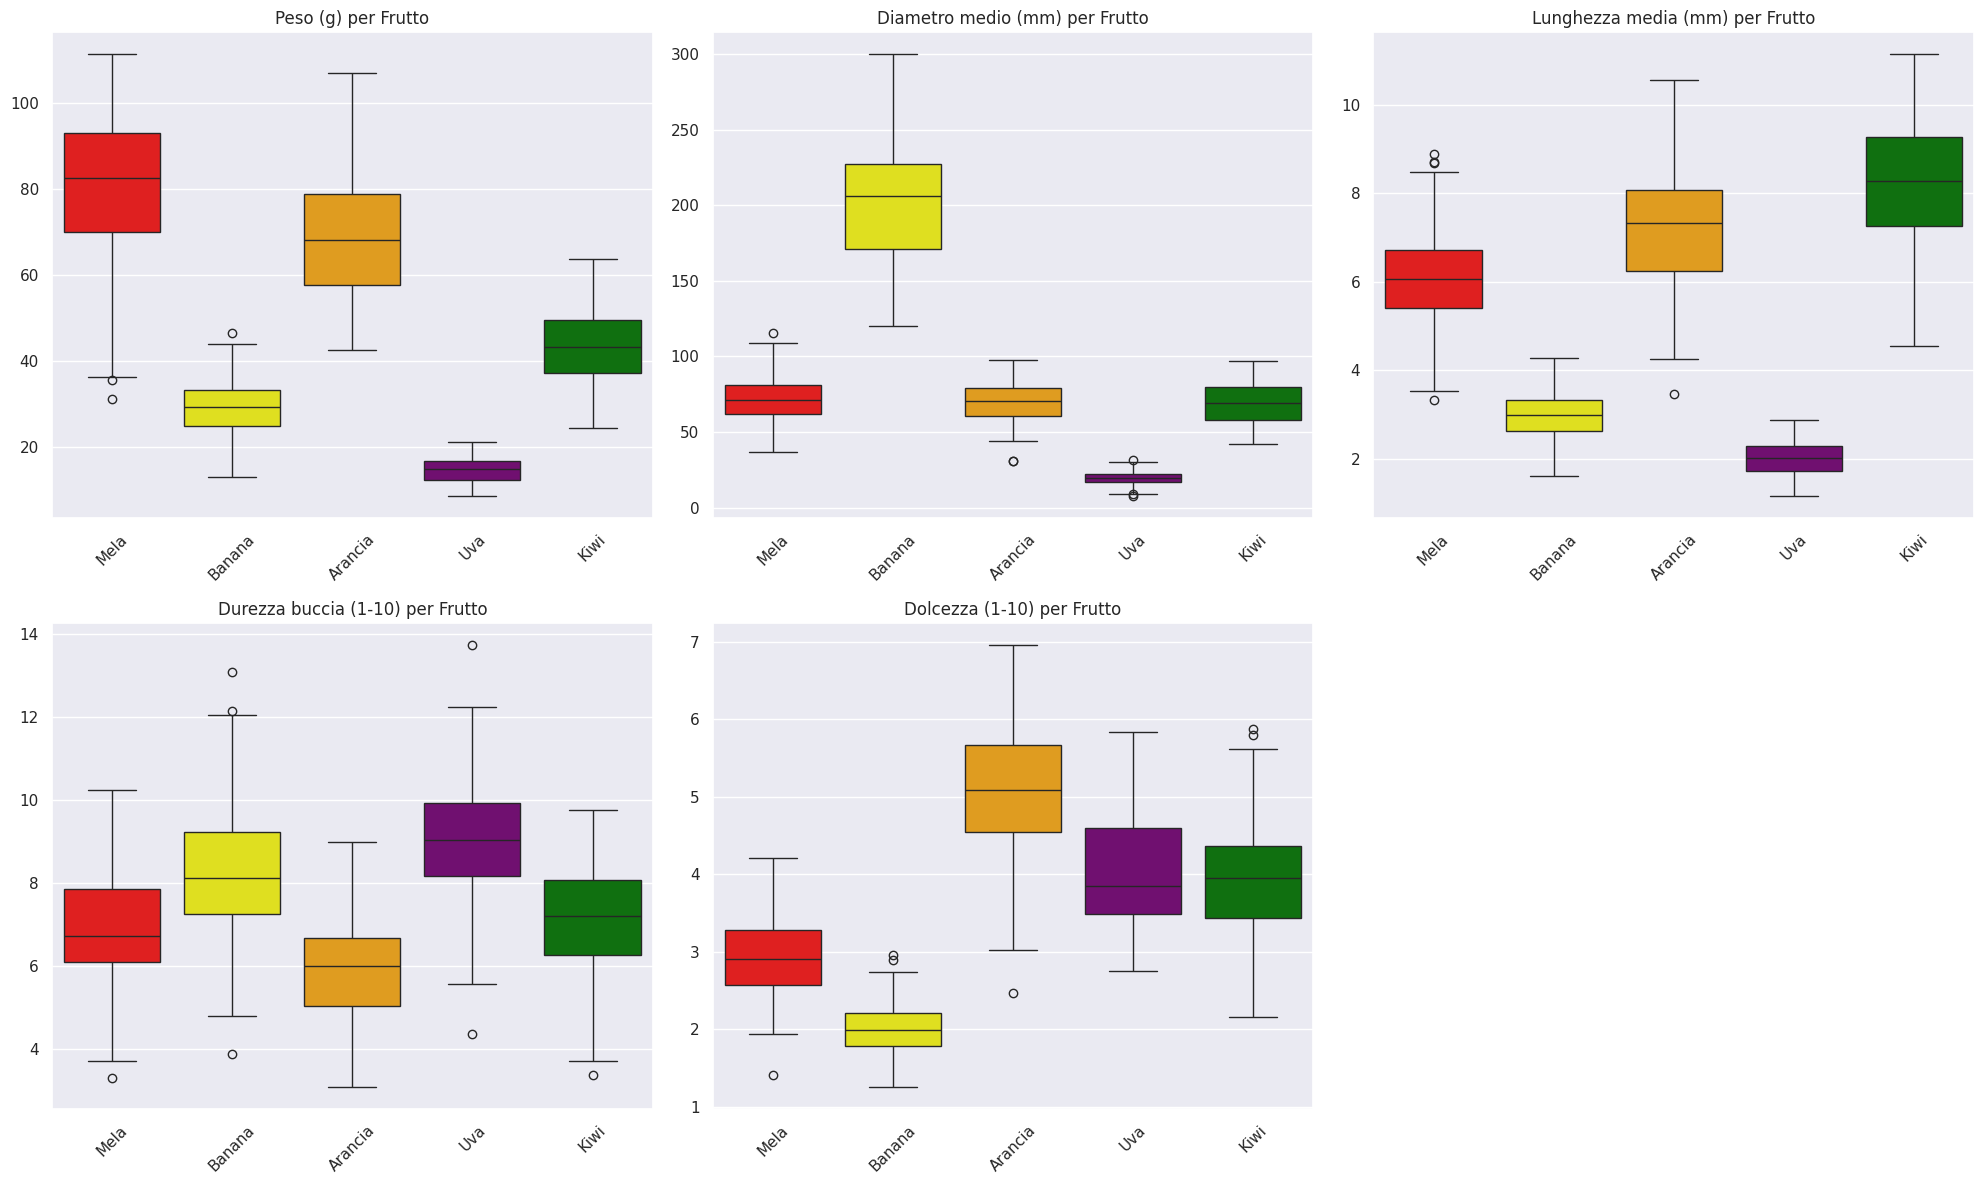

In [ ]:
# Boxplot for every numerical feature

numerical_features = df.drop('Frutto', axis=1)

# Creating a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Tranforming into a monodimensional array
axes = axes.ravel()

# mapping colours dictionary
color_map = {"Mela": "red", "Banana": "yellow", "Arancia": "orange", "Uva": "purple", "Kiwi": "green"}


for idx, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='Frutto', y=feature, ax=axes[idx], palette = color_map)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
    axes[idx].set_title(f'{feature} per Frutto')
    axes[idx].set_xlabel('')  # Removing x axis title
    axes[idx].set_ylabel('')  # Removing y axis title

# 6th graphic not needed
fig.delaxes(axes[5])

# optimize space
plt.tight_layout()
plt.show()

# Modeling

In [ ]:
# Converting string into numbers in target variable
fruits_map = {"Mela": 0, "Banana": 1, "Arancia": 2, "Uva": 3, "Kiwi": 4}
df["Frutto"] = df["Frutto"].map(fruits_map)
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,0,86.40,89.68,8.69,9.61,2.41
1,0,77.58,73.45,6.49,7.20,3.87
2,0,81.95,81.66,6.40,9.09,2.88
3,0,66.33,36.71,6.78,8.21,2.55
4,0,56.73,75.69,5.78,9.15,3.88


In [ ]:
# train, test creation
X = df.drop("Frutto", axis=1)
y = df["Frutto"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.3, random_state=31)

In [ ]:
# Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def find_betterK(X_train, y_train, X_test, y_test, Ks):
    """
    Function to find the best K for KNN model.

    Parameters:
    - X_train: Training data features.
    - y_train: Training data labels.
    - X_test: Testing data features.
    - y_test: Testing data labels.
    - Ks: List of K values to test.

    Returns:
    - The best K value based on the lowest log loss on the test set.
    """
    results = []

    for K in Ks:
        print(f"K = {K}")
        knn = KNeighborsClassifier(n_neighbors=K)
        knn.fit(X_train, y_train)

        # Train and test predictions
        y_pred_train = knn.predict(X_train)
        y_proba_train = knn.predict_proba(X_train)
        y_pred_test = knn.predict(X_test)
        y_proba_test = knn.predict_proba(X_test)

        # Accuracy and Log Loss
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        log_train = log_loss(y_train, y_proba_train)
        log_test = log_loss(y_test, y_proba_test)

        # for every K, print results
        print(f"Accuracy: TRAIN = {accuracy_train:.3f}, TEST = {accuracy_test:.3f}")
        print(f"Log Loss: TRAIN = {log_train:.4f}, TEST = {log_test:.4f}\n")

        # Saving into the list
        results.append({
            'K': K,
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'log_train': log_train,
            'log_test': log_test
        })

    # Find the best result checking Log Loss on test set
    best_result = min(results, key=lambda x: x['log_test'])

    print(f"Il miglior K è {best_result['K']} con Log Loss Test = {best_result['log_test']:.4f}")

    return best_result['K']

# Find the best K
Ks = [1, 2, 3, 4, 5, 10, 12, 15, 20, 30, 40, 50]
best_k = find_betterK(X_train, y_train, X_test, y_test, Ks)

K = 1
Accuracy: TRAIN = 1.000, TEST = 0.887
Log Loss: TRAIN = 0.0000, TEST = 4.0849

K = 2
Accuracy: TRAIN = 0.954, TEST = 0.913
Log Loss: TRAIN = 0.0673, TEST = 1.0674

K = 3
Accuracy: TRAIN = 0.951, TEST = 0.907
Log Loss: TRAIN = 0.0985, TEST = 0.6337

K = 4
Accuracy: TRAIN = 0.949, TEST = 0.920
Log Loss: TRAIN = 0.1070, TEST = 0.6203

K = 5
Accuracy: TRAIN = 0.949, TEST = 0.907
Log Loss: TRAIN = 0.1132, TEST = 0.6376

K = 10
Accuracy: TRAIN = 0.949, TEST = 0.920
Log Loss: TRAIN = 0.1303, TEST = 0.4156

K = 12
Accuracy: TRAIN = 0.940, TEST = 0.907
Log Loss: TRAIN = 0.1391, TEST = 0.2041

K = 15
Accuracy: TRAIN = 0.937, TEST = 0.887
Log Loss: TRAIN = 0.1506, TEST = 0.2086

K = 20
Accuracy: TRAIN = 0.937, TEST = 0.907
Log Loss: TRAIN = 0.1632, TEST = 0.2181

K = 30
Accuracy: TRAIN = 0.943, TEST = 0.900
Log Loss: TRAIN = 0.1823, TEST = 0.2316

K = 40
Accuracy: TRAIN = 0.940, TEST = 0.900
Log Loss: TRAIN = 0.2044, TEST = 0.2483

K = 50
Accuracy: TRAIN = 0.937, TEST = 0.900
Log Loss: TRAI

In [ ]:
# knn initialization with best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
#Train predictions
y_pred_train = knn.predict(X_train)
y_proba_train = knn.predict_proba(X_train)

#Test predictions
y_pred_test = knn.predict(X_test)
y_proba_test = knn.predict_proba(X_test)

In [ ]:
# Creating a list of target names
inverted_fruits_map = {v: k for k, v in fruits_map.items()}
inverted_fruits_map
class_names = list(inverted_fruits_map.values())

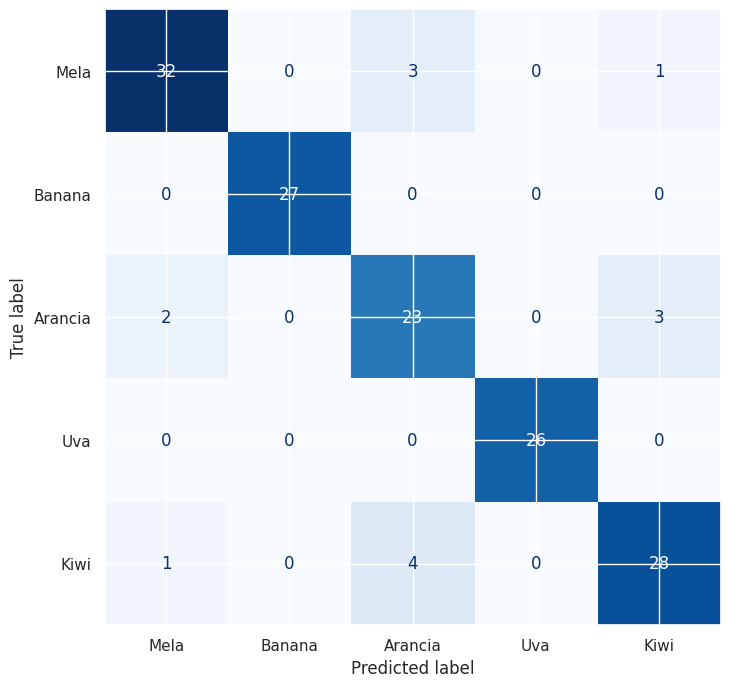

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

# a little bigger
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", colorbar=False, ax=ax)
plt.show()


# Conclusions

- Classification of **"Banana"** and **"Uva"** classes is **perfect**.
- **"Mela"**, **"Arancia"** and **"Kiwi"** are sometimes confused with each other, but it is acceptable considering that some key features, such as **"Weight"**, **"Diameter"** and **"Length"**, are comparable between the three fruits

## Suggestions to improve the dataset:
- increasing the number of examples will certainly allow to better discriminate even the most similar fruits
- adding more important features, such as color or acidity, will increase even further the model performance
